# 0. Import des modules

In [1]:
# pour créer des graphes
%matplotlib inline
import matplotlib.pyplot as plt

# pour générer les aléas
import numpy as np

# pour gérer des tables de données
import pandas as pd

# pour faire des graphes statistiques
import seaborn as sns
sns.set()

# 1. Génération de nombres aléatoires

On ne fait que du pseudo-aléatoire.

On peut reproduire les expériences en fixant la graine aléatoire (*seed*).

## 1.1. Pile ou face

In [2]:
np.random.choice(['Pile', 'Face'])

'Pile'

Faire une boucle et compter le nombre de "Pile".

In [3]:
pile = 0

for i in range(100):
    tirage = np.random.choice(['Pile', 'Face'])
    
    if tirage == 'Pile':
        pile += 1

print(f"J'ai obtenu {pile} piles.")

J'ai obtenu 47 piles.


Pipons les dés.

In [4]:
np.random.choice(['Pile', 'Face'], p=[0.9, 0.1])

'Face'

On peut faire plein de tirages d'un coup.

In [5]:
np.random.choice(['Pile', 'Face'], p=[0.9, 0.1], size=10)

array(['Pile', 'Face', 'Pile', 'Pile', 'Pile', 'Pile', 'Face', 'Face',
       'Pile', 'Pile'], dtype='<U4')

Fixons la graine.

In [6]:
np.random.seed(42)
np.random.choice(['Pile', 'Face'], p=[0.9, 0.1], size=10)

array(['Pile', 'Face', 'Pile', 'Pile', 'Pile', 'Pile', 'Pile', 'Pile',
       'Pile', 'Pile'], dtype='<U4')

In [7]:
np.sum(np.random.choice(['Pile', 'Face'], size=100) == 'Pile')

37

Quel chance a-t-on d'obtenir plus de 60 piles sur 100 tirages ?

In [8]:
nb_iter = 100000
cnt = 0

for i in range(nb_iter):
    nb_piles = np.sum(np.random.choice(['Pile', 'Face'], size=100) == 'Pile')
    
    if nb_piles >= 60:
        cnt += 1

print(f"J'ai obtenu {cnt/nb_iter:.1%} d'occurences.")

J'ai obtenu 2.9% d'occurences.


/home/girardea/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


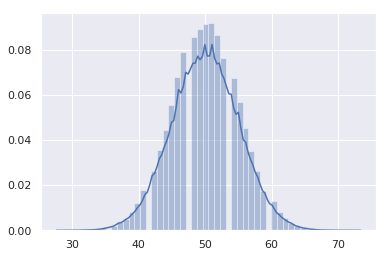

In [9]:
nb_iter = 100000
cnt = 0
nb_piles = []

for i in range(nb_iter):
    nb_piles.append(np.sum(np.random.choice(['Pile', 'Face'], size=100) == 'Pile'))

sns.distplot(nb_piles)

# 1.2. Marche aléatoire

In [10]:
np.cumsum(np.random.choice([-1, 1], size=100))

array([ -1,  -2,  -3,  -4,  -3,  -4,  -3,  -4,  -5,  -4,  -3,  -4,  -3,
        -4,  -5,  -6,  -5,  -6,  -7,  -8,  -9, -10, -11, -12, -11, -12,
       -13, -12, -13, -12, -13, -14, -13, -12, -11, -12, -13, -12, -13,
       -12, -13, -12, -11, -10, -11, -10,  -9, -10,  -9,  -8,  -9,  -8,
        -7,  -6,  -7,  -8,  -9, -10, -11, -12, -11, -10,  -9,  -8,  -7,
        -8,  -7,  -6,  -5,  -4,  -5,  -4,  -3,  -2,  -1,   0,   1,   0,
         1,   2,   3,   2,   3,   4,   5,   6,   7,   6,   5,   6,   7,
         8,   9,  10,  11,  10,   9,   8,   9,  10])

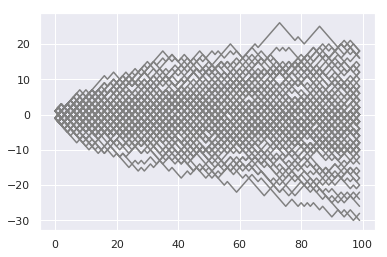

In [11]:
size = 100

for i in range(100):
    x = range(size)
    y = np.cumsum(np.random.choice([-1, 1], size=size))

    plt.plot(x, y, c='grey')

## 1.3. Loi uniforme

In [12]:
np.random.uniform(size=100)

array([0.53227782, 0.15417818, 0.54007647, 0.6660654 , 0.01719608,
       0.34244648, 0.64350445, 0.31209664, 0.29281043, 0.6372899 ,
       0.74448483, 0.63607333, 0.01445278, 0.41583286, 0.7469459 ,
       0.87679922, 0.70414683, 0.11086132, 0.34490396, 0.5581552 ,
       0.23311731, 0.46571703, 0.73145777, 0.80441021, 0.05072944,
       0.4944729 , 0.0640027 , 0.49972183, 0.95363132, 0.29656863,
       0.22641012, 0.15702282, 0.87345209, 0.88616644, 0.10639349,
       0.11081358, 0.86832193, 0.16681072, 0.60019242, 0.79051315,
       0.06491374, 0.59255001, 0.06519116, 0.74929976, 0.03942928,
       0.51879575, 0.11545359, 0.33096308, 0.64200134, 0.41889053,
       0.12979519, 0.90785131, 0.99213355, 0.89021682, 0.53587173,
       0.70067266, 0.52989737, 0.83518581, 0.41944254, 0.19969902,
       0.83119501, 0.88352021, 0.5352387 , 0.64342398, 0.96332813,
       0.20108207, 0.26872285, 0.28736375, 0.86574389, 0.28313994,
       0.5413605 , 0.32370577, 0.89265521, 0.52640211, 0.22244

Combien de nombres sont entre 0.9 et 1 ?

In [13]:
np.sum(np.random.uniform(size=100) >= 0.9)

13

On peut changer les bornes.

In [14]:
np.random.uniform(low=0.0, high=80.0, size=10)

array([25.75571244, 35.52074781, 79.93488253, 70.87755742,  1.22093551,
       23.37388283, 61.16744167, 20.80176377, 64.26250205, 56.55351917])

/home/girardea/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


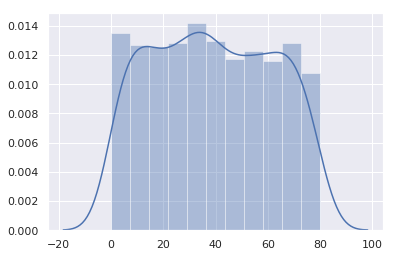

In [15]:
tirages = np.random.uniform(low=0.0, high=80.0, size=1000)

sns.distplot(tirages)

En moyenne, on obtient encore une Gaussienne.

/home/girardea/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


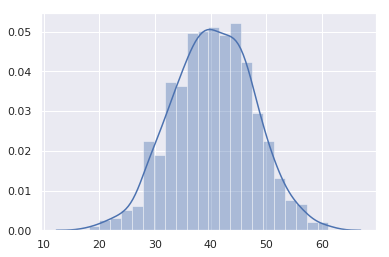

In [16]:
tirages = [np.mean(np.random.uniform(low=0.0, high=80.0, size=10)) for i in range(1000)]

sns.distplot(tirages)

# 2. Classification de résiliations télécom

In [17]:
df = pd.read_csv('https://bit.ly/2Pkupqx')

df.info()

df.sample(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 18 columns):
churn                         5000 non-null object
accountlength                 5000 non-null int64
internationalplan             5000 non-null object
voicemailplan                 5000 non-null object
numbervmailmessages           5000 non-null int64
totaldayminutes               5000 non-null float64
totaldaycalls                 5000 non-null int64
totaldaycharge                5000 non-null float64
totaleveminutes               5000 non-null float64
totalevecalls                 5000 non-null int64
totalevecharge                5000 non-null float64
totalnightminutes             5000 non-null float64
totalnightcalls               5000 non-null int64
totalnightcharge              5000 non-null float64
totalintlminutes              5000 non-null float64
totalintlcalls                5000 non-null int64
totalintlcharge               5000 non-null float64
numbercustomerservicecal

,churn,accountlength,internationalplan,voicemailplan,numbervmailmessages,totaldayminutes,totaldaycalls,totaldaycharge,totaleveminutes,totalevecalls,totalevecharge,totalnightminutes,totalnightcalls,totalnightcharge,totalintlminutes,totalintlcalls,totalintlcharge,numbercustomerservicecalls
3976,No,27,no,yes,32,190.3,97,32.35,279.0,77,23.72,133.8,117,6.02,8.4,3,2.27,2
4829,No,95,no,yes,27,190.8,76,32.44,177.5,104,15.09,227.3,95,10.23,5.9,1,1.59,2
2537,No,122,no,no,0,215.6,86,36.65,167.8,59,14.26,207.0,67,9.32,6.4,8,1.73,3
619,Yes,110,yes,no,0,293.3,79,49.86,188.5,90,16.02,266.9,91,12.01,14.5,4,3.92,0
1357,No,97,no,no,0,169.7,84,28.85,165.9,86,14.10,191.9,83,8.64,12.8,6,3.46,3


## 2.1. Caractéristiques du jeu de données

### Risque de résiliation

In [18]:
np.mean(df['churn'] == 'Yes')

0.1414

## 2.2. Algo idiot, fonctions de comparaison

In [19]:
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score

X = df[["accountlength", "numbercustomerservicecalls"]]
y = (df['churn'] == 'Yes')

def eval_clf(X, y, clf, nb_splits=10):
    """Evaluate a classifier"""
    precisions = []
    recalls = []
    f1s = []
    
    for i in range(nb_splits):
        # Split
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)

        clf.fit(X_train, y_train)

        y_pred = clf.predict(X_test)
        
        precisions.append(precision_score(y_test, y_pred))
        recalls.append(recall_score(y_test, y_pred))
        f1s.append(f1_score(y_test, y_pred))
    
    return {
        'precision': precisions,
        'recall': recalls,
        'f1': f1s
    }

eval_clf(X, y, DummyClassifier())

{'precision': [0.15343915343915343,
  0.136986301369863,
  0.15270935960591134,
  0.08762886597938144,
  0.1477832512315271,
  0.14814814814814814,
  0.13953488372093023,
  0.11650485436893204,
  0.11926605504587157,
  0.12093023255813953],
 'recall': [0.13679245283018868,
  0.14150943396226415,
  0.14622641509433962,
  0.08018867924528301,
  0.14150943396226415,
  0.1509433962264151,
  0.14150943396226415,
  0.11320754716981132,
  0.12264150943396226,
  0.12264150943396226],
 'f1': [0.14463840399002495,
  0.13921113689095127,
  0.1493975903614458,
  0.08374384236453201,
  0.14457831325301207,
  0.14953271028037385,
  0.1405152224824356,
  0.11483253588516747,
  0.12093023255813955,
  0.12177985948477753]}

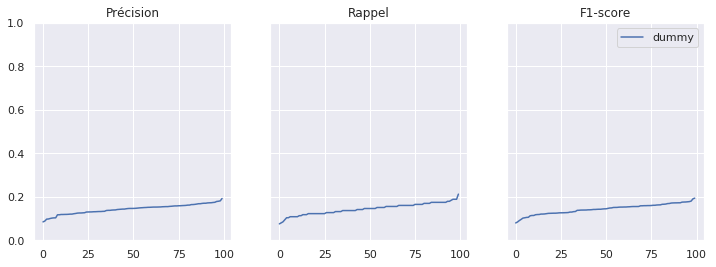

In [40]:
def plot_clf(X, y, clfs, labels=None, nb_splits=10):
    """Plot classifier performance (F1-score)"""
    # check if list
    if type(clfs) != list:
        clfs = [clfs]
    
    scores = []
    for clf in clfs:
        # Remember that eval_clf returns precisions, recalls, f1s
        scores.append(eval_clf(X, y, clf, nb_splits))
    
    x = range(nb_splits)
    
    _, ax = plt.subplots(1, 3, sharey=True, figsize=(12, 4))
    
    # loop over all classifiers scores
    for score in scores:
        ax[0].plot(x, np.sort(score['precision']))
    ax[0].set(
        title='Précision',
        ylim=(0, 1)
    )
    
    # loop over all classifiers scores
    for score in scores:
        ax[1].plot(x, np.sort(score['recall']))
    ax[1].set(
        title='Rappel',
        ylim=(0, 1)
    )
    
    # loop over all classifiers scores
    for score in scores:
        ax[2].plot(x, np.sort(score['f1']))
    ax[2].set(
        title='F1-score',
        ylim=(0, 1)
    )
    
    if labels is not None:
        plt.legend(labels, loc='upper right')
    
    return

plot_clf(X, y, DummyClassifier(), labels=['dummy'], nb_splits=100)

/home/girardea/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


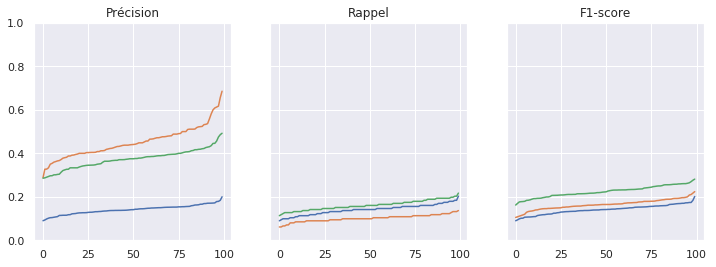

In [21]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

plot_clf(X, y,
         [
             DummyClassifier(),
             KNeighborsClassifier(),
             RandomForestClassifier()
         ], nb_splits=100)

## 2.3. Preprocessing

In [25]:
from sklearn.preprocessing import QuantileTransformer, StandardScaler
from sklearn.pipeline import Pipeline

In [29]:
X = df.drop(columns=['churn'])
y = (df['churn'] == 'Yes')

X.sample(3)

,accountlength,internationalplan,voicemailplan,numbervmailmessages,totaldayminutes,totaldaycalls,totaldaycharge,totaleveminutes,totalevecalls,totalevecharge,totalnightminutes,totalnightcalls,totalnightcharge,totalintlminutes,totalintlcalls,totalintlcharge,numbercustomerservicecalls
2166,166,no,no,0,197.9,89,33.64,251.0,113,21.34,138.3,85,6.22,11.2,2,3.02,2
2253,63,yes,no,0,62.9,112,10.69,202.9,111,17.25,259.0,58,11.66,8.9,8,2.40,1
4936,102,no,no,0,145.8,59,24.79,223.1,109,18.96,219.2,104,9.86,9.8,3,2.65,0


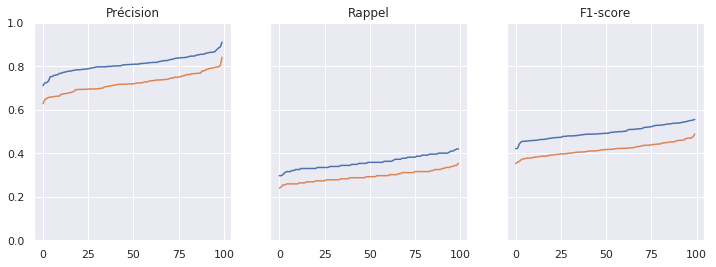

In [34]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

# KNN + encodage et mise à l'échelle
enc_str_cols = ColumnTransformer(
    transformers=[
        ('enc_str_cols', OneHotEncoder(), ['internationalplan', 'voicemailplan'])
    ], remainder='passthrough')

pipe_knn_enc = Pipeline(steps=[
    ('enc_str_cols', enc_str_cols),
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier())
])

# KNN en virant les données textuelles
drop_str_cols = ColumnTransformer(
    transformers=[
        ('drop_str_cols', 'drop', ['internationalplan', 'voicemailplan'])
    ], remainder='passthrough')

pipe_knn_drop = Pipeline(steps=[
    ('drop_str_cols', drop_str_cols),
    ('knn', KNeighborsClassifier())
])

plot_clf(X, y, [pipe_knn_enc, pipe_knn_drop], nb_splits=100)

Dites-moi combien de voisins (*n_neighbors*) est optimal ?

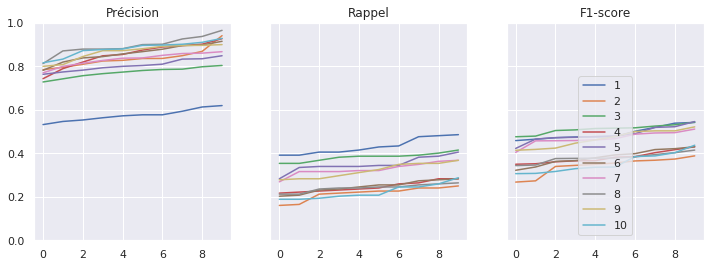

In [47]:
pipes = [
    Pipeline(steps=[
        ('enc_str_cols', enc_str_cols),
        ('scaler', StandardScaler()),
        ('knn', KNeighborsClassifier(n_neighbors=i))
    ])
    for i in range(1, 11)
]

plot_clf(X, y, pipes, labels=range(1, 11), nb_splits=10)